In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import pandas as pd
import datetime
from multihist import Hist1d, Histdd
import time
import itertools
import os
import math
from scipy import stats
from scipy.optimize import curve_fit

import socket
import strax
import straxen
import cutax

from straxen import units
from straxen.get_corrections import get_correction_from_cmt
from cutax.cuts import *

%load_ext autoreload
%autoreload 2

ddir = '/dali/lgrandi/dandrea/data'

In [2]:
straxen.print_versions()

,module,version,path,git
0,python,3.8.13,/opt/XENONnT/anaconda/envs/XENONnT_development...,None
1,strax,1.4.0,/opt/XENONnT/anaconda/envs/XENONnT_development...,None
2,straxen,2.0.0,/opt/XENONnT/anaconda/envs/XENONnT_development...,None
3,cutax,1.13.0,/dali/lgrandi/xenonnt/software/cutax/v1.13.0/c...,None


In [3]:
st = cutax.contexts.xenonnt_online(cut_list=[cutax.cut_lists.basic.BasicCuts,
                                             cutax.cut_lists.kr83m.Kr83mSelection,
                                             cutax.cut_lists.s2width_test.S2Width])

In [6]:
dsets = st.select_runs(run_mode='background_linked',available='event_info')

Checking data availability:   0%|          | 0/3 [00:00<?, ?it/s]

In [8]:
sr1_runs = dsets.name.values[:]

In [10]:
run_id = sr1_runs[0]
events = st.get_array(run_id,'event_info')

Loading event_info: |          | 0.00 % [00:00<?]

In [38]:
@strax.takes_config(
    strax.Option(name='s1area_s2area_tags',
                 default=immutabledict(
                     kr83m=dict(s1=(100, 700), s2=(1e3, 2e4), rel_pos=(-0.2, -0.5)),
                     Gamma=dict(s1=(1e3, 3e4), s2=(1e4, 1e6), rel_pos=(-0.4, 2.2)),
                     Alpha=dict(s1=(3.2e4, 9e4), s2=(0.8e4, 5e4), rel_pos=(-.2, -.5)),
                     ar37=dict(s1=(1., 40.), s2=(200., 1e4), rel_pos=(0.2, -0.5)),
                 ),
                 type=immutabledict,
                 help='Tags for S1 area S2 area'),
    strax.Option(name='event_evolution_nbins',
                 default=200,
                 type=int,
                 help='Resolution of evolution of the events')
)

SyntaxError: unexpected EOF while parsing (3341670023.py, line 15)

In [61]:
import pytz
def timestamp_to_datetime(times):
    """Convert ns timestamps to datetime objects"""
    return np.array([datetime.datetime.fromtimestamp(t / 1e9, tz=pytz.utc)
                     for t in times])
def data_to_plot( data , sel1 = (100, 700), sel2 = (1e3, 2e4), bins = 200):
    fig, ax = plt.subplots(figsize=(8,4.5))
    mask = np.ones(len(data), dtype=np.bool_)
    mask &= data['s1_area'] > sel1[0]
    mask &= data['s1_area'] < sel1[1]
    mask &= data['s2_area'] > sel2[0]
    mask &= data['s2_area'] < sel2[1]
    times = (data[mask]['time'] + data[mask]['endtime']) / 2
    print(times)
    if len(times) >= 2:
        y, bin_edges = np.histogram(times, bins=bins)
        x = timestamp_to_datetime((bin_edges[1:] + bin_edges[:-1]) / 2)
        dates = matplotlib.dates.date2num(times + datetime.timedelta(hours=7))
        
        dt = (bin_edges[1] - bin_edges[0]) / 1e9
        yerr = np.sqrt(y) / dt
        y = y / dt
        ax.plot(x, y, label='gamma rate')
        ax.fill_between(x, y - yerr, y + yerr, alpha=0.4, step='mid')
        ax.set_xlabel('time')
        ax.set_ylabel('rate (Hz)')
        #ax.xaxis.set_major_formatter("%d/%m %H:%M")
        ax.xaxis.set_tick_params(rotation=45)
        myFmt = matplotlib.dates.DateFormatter('%d%bH%H')
        ax.xaxis.set_major_formatter(myFmt)
        ax.legend()
    else:
        y, x = [1] * len(times), utils.timestamp_to_datetime(times)
        ax.scatter(x, y, label=name)

[1.66614601e+18 1.66614601e+18 1.66614601e+18 ... 1.66615681e+18
 1.66615681e+18 1.66615681e+18]


TypeError: unsupported operand type(s) for +: 'float' and 'datetime.timedelta'

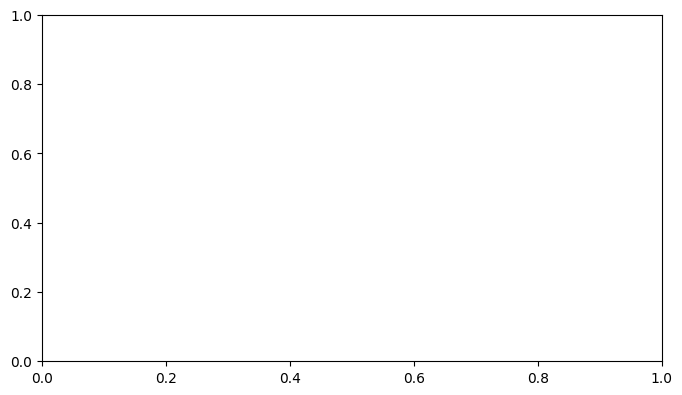

In [62]:
data_to_plot( events, Gamma_s1,Gamma_s2 )